<a href="https://colab.research.google.com/github/Swayamprakashpatel/Sol_ME/blob/main/Sol_ME_LogP_MolWt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
#df = pd.read_csv('/content/drive/My Drive/DE.csv', low_memory=False,)
url = '/content/Data_FP_11.csv'
df = pd.read_csv(url, low_memory=False,) # Run for labeled data

#df.fillna('&',inplace=True)
df.drop('DRUG', axis = 1, inplace = True)
df.drop('CARRIER', axis = 1, inplace = True)

print(df.shape)
df.head()
df.dtypes
#df.columns[df.isna().any()].tolist()
dataset = df.values

(1379, 1767)


In [ ]:
print(dataset)

In [80]:
X1 = dataset[:,0:1]/1000 #(standardize wiht 1000)Mol.Wt of Drug
X2 = dataset[:,1:2]/1000 #(standardize wiht 1000)Mol Wt of Carrier
X3 = dataset[:,2:3]/100 #(standardize wiht 100)LogP of Drug
X4 = dataset[:,3:4]/100 #(standardize wiht 100)LogP of Drug
X5 = dataset[:,4:1766]
X = np.concatenate((X1, X2, X3, X4, X5), axis=1)
X = X.astype(np.int64)
#Y = dataset[:,1762:1763]
# Run this for labeled data
Y = dataset[:,1766:1767]


#Y = np.log(Y)
#print(X, X.shape,X.dtype)
#print(Y, Y.shape, Y.dtype)
#print(X, X.shape,Y, Y.shape)
print(pd.DataFrame(X).head)

<bound method NDFrame.head of       0     1     2     3     4     5     6     7     8     9     ...  1756  \
0        0     0     0     0     1     1     0     0     0     0  ...     0   
1        0     0     0     0     1     1     0     0     0     0  ...     0   
2        0     0     0     0     1     1     0     0     0     0  ...     0   
3        0     0     0     0     1     1     0     0     0     0  ...     0   
4        0     0     0     0     1     1     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1374     0     0     0     0     1     1     0     0     0     0  ...     0   
1375     0     0     0     0     1     1     0     0     0     0  ...     0   
1376     0     0     0     0     1     1     0     0     0     0  ...     0   
1377     0     0     0     0     1     1     0     0     0     0  ...     0   
1378     0     0     0     0     1     1     0     0     0     0  ...     0   

      1757  1758  175

In [81]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3,random_state = 42 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 42)
import numpy as np

X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.float32)
Y_val = np.asarray(Y_val).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

filepath = '/content/SOLModel.keras'

checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=575, verbose =1)]
output_nodes = Y.shape[1]
print(output_nodes)


1


Epoch 1/200
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7466.5596 - root_mean_squared_error: 86.1081
Epoch 1: val_root_mean_squared_error improved from 90.91046 to 77.86806, saving model to /content/SOLModel.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 7432.5376 - root_mean_squared_error: 85.9193 - val_loss: 6063.4346 - val_root_mean_squared_error: 77.8681
Epoch 2/200
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6363.6250 - root_mean_squared_error: 79.1330
Epoch 2: val_root_mean_squared_error improved from 77.86806 to 75.26220, saving model to /content/SOLModel.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6344.7461 - root_mean_squared_error: 79.0411 - val_loss: 5664.3989 - val_root_mean_squared_error: 75.2622
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5365.0952 - root_mean_squared_error: 72.5827
Epoch 3: val_root_mean_squared_error improved from 75.26220 to 73.15878, saving model to /content/SOLModel.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/ste

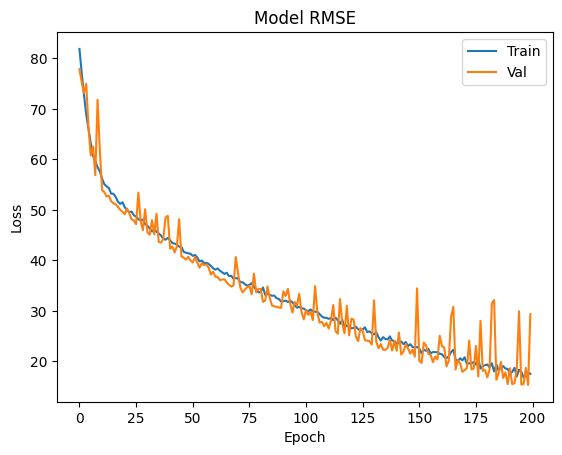

Training RMSE is
16.832677841186523
Validation RMSE is
15.362715721130371
Training loss is
283.3390197753906
Validation loss is
236.01303100585938


In [83]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation='relu', input_shape=(1766,)),
                             tf.keras.layers.Dense(512, activation='relu'),
                             #tf.keras.layers.Dense(1762, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='relu')])

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.2), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model.fit(X, Y, epochs= 200, callbacks=[checkpoint],validation_data=(X, Y), batch_size= None)
model.evaluate(X_test, Y_test)

# Error Graph

plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)



In [ ]:
model.save('model1.hdf5')

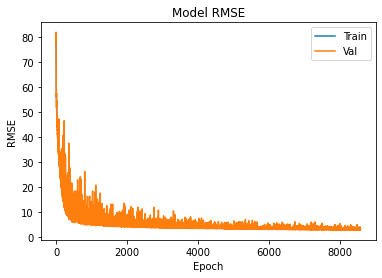

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.savefig('Training.svg', dpi = 600)



44/44 [==============================] - 0s 5ms/step


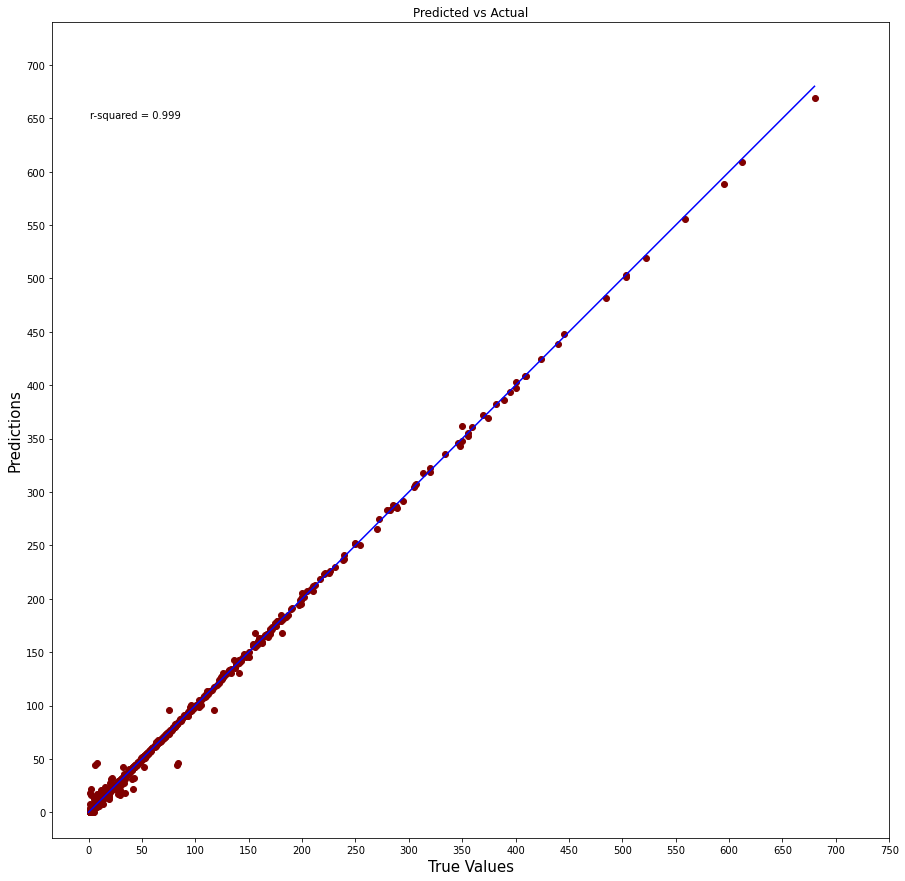

In [ ]:
from sklearn.metrics import r2_score
true_value = Y
predicted_value = model.predict(X)

plt.figure(figsize=(15,15))
plt.scatter(true_value, predicted_value, c='maroon')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Predicted vs Actual')
plt.annotate("r-squared = {:.3f}".format(r2_score(true_value, predicted_value)), (1,650), )
plt.xticks( range(0,800,50) )
plt.yticks( range(0,800,50) )
#plt.show()
plt.savefig('P_A.svg', dpi = 1200)

10/10 [==============================] - 0s 4ms/step


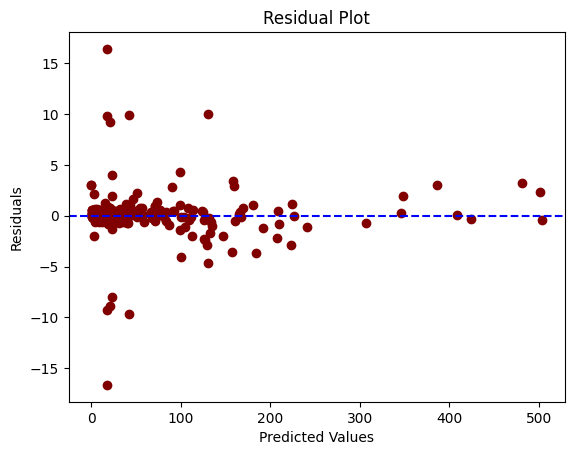

In [ ]:
true_value = Y
predicted_value = model.predict(X)

residuals = true_value - predicted_value

plt.scatter(predicted_value, residuals, c='maroon')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
#plt.show()
plt.savefig('P_A.svg', dpi = 1200)

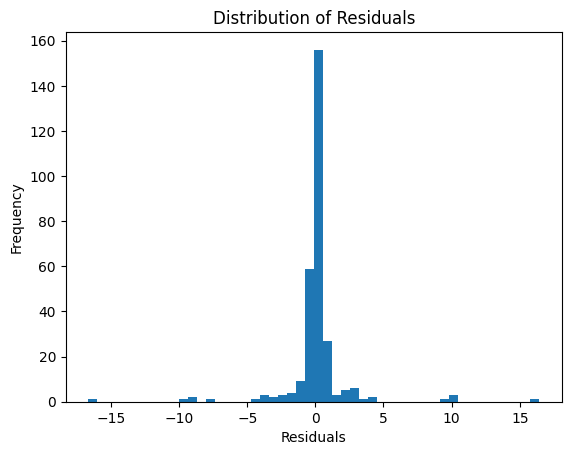

In [ ]:
residuals = true_value - predicted_value

plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
#plt.show()
plt.savefig('P_A.svg', dpi = 1200)

In [ ]:
#@title Insert PubChem Fingerprint of Drug and Carrier (Oil, Surfactant, Cosurfactant)
!pip install pubchempy
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1-nyzDQCzvTqDKyu9j7iXCl_GNwJ6wrw1',
                                   dest_path='/content/sample_data/Sol_ME.hdf5',
                                   unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile= True)


Drug_CID =  24872560#@param {type:"number"}
Excipient_CID =  3314#@param {type:"number"}

#LOGP of DRUG AND CARRIER
logp_D = pcp.Compound.from_cid(Drug_CID)
logp_D = logp_D.xlogp
logp_D = float(logp_D)/100

logp_C = pcp.Compound.from_cid(Excipient_CID)
logp_C = logp_C.xlogp
logp_C = float(logp_C)/100

#Mol. Wt of Drug and Excipeint
Molwt_of_Drug = pcp.Compound.from_cid(Drug_CID)
Molwt_of_Drug = Molwt_of_Drug.molecular_weight
Molwt_of_Drug = float(Molwt_of_Drug)/1000

Molwt_of_Excipient = pcp.Compound.from_cid(Drug_CID)
Molwt_of_Excipient = Molwt_of_Excipient.molecular_weight
Molwt_of_Excipient = float(Molwt_of_Excipient)/1000

#FINGERPRINT OF DRUG AND CARRIER
CID_D = pcp.Compound.from_cid(Drug_CID)
CID_E = pcp.Compound.from_cid(Excipient_CID)

FPD = CID_D.cactvs_fingerprint
FPE = CID_E.cactvs_fingerprint

List1 = [Molwt_of_Drug, Molwt_of_Excipient, logp_D, logp_C]

List2 = list(FPD)
List3 = list(FPE)
List = List1 + List2 + List3


import pandas as pd
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))

#@title RUN FOR PREDICTION


dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1766].astype(float))
#print(X_Predict)
#print(X_Predict.shape)
#print(X_Predict.dtype)

Y_prediction = model.predict(X_Predict)

print(Y_prediction, "mg/ml")

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=860fce7f55cd7debb8c52253d867e1ae86e7f12e2bc5a7079cdfc865c0b3c27e
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy
1/1 [==============================] - 0s 211ms/step
[[141.06665]] mg/ml


In [ ]:
#@title Insert PubChem Fingerprint of Drug and Carrier (Oil, Surfactant, Cosurfactant)
!pip install pubchempy
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1-nyzDQCzvTqDKyu9j7iXCl_GNwJ6wrw1',
                                   dest_path='/content/sample_data/Sol_ME.hdf5',
                                   unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile= True)


Drug_CID =  24872560#@param {type:"number"}
Excipient_CID =  3314#@param {type:"number"}
LogP_of_Drug =  11.3#@param {type:"number"}
LogP_of_Excipient =  2#@param {type:"number"}
MolWt_of_Drug =  11.3#@param {type:"number"}
MolWt_of_Excipient =  2#@param {type:"number"}

#LOGP of DRUG AND CARRIER

logp_D = LogP_of_Drug/100

logp_C = LogP_of_Excipient/100

#Mol.Wt of Drug and Carrier
MolWt_of_Drug = MolWt_of_Drug/1000
MolWt_of_Excipient =  MolWt_of_Excipient/1000

#FINGERPRINT OF DRUG AND CARRIER
CID_D = pcp.Compound.from_cid(Drug_CID)
CID_E = pcp.Compound.from_cid(Excipient_CID)

FPD = CID_D.cactvs_fingerprint
FPE = CID_E.cactvs_fingerprint

List1 = [MolWt_of_Drug, MolWt_of_Excipient, logp_D, logp_C]

List2 = list(FPD)
List3 = list(FPE)
List = List1 + List2 + List3


import pandas as pd
t = pd.DataFrame(np.array(List).reshape(-1,len(List)))

#@title RUN FOR PREDICTION


dataset1 = t.values
t.dtype = int
X_Predict = (dataset1[:,0:1766].astype(float))
#print(X_Predict)
#print(X_Predict.shape)
#print(X_Predict.dtype)

Y_prediction = model.predict(X_Predict)

print(Y_prediction, "mg/ml")

In [ ]:
#@title UPLOAD EXCEL (Predict.xlsx) for Multiple Prediction
#Uploade Predict.xlsx file
!pip install pubchempy
import tensorflow as tf
import pandas as pd
import numpy as np
import io
from tensorflow import keras
import pubchempy as pcp
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
import time as tm
from google_drive_downloader import GoogleDriveDownloader as gdd
from google.colab import files
uploaded = files.upload()

gdd.download_file_from_google_drive(file_id='1-nyzDQCzvTqDKyu9j7iXCl_GNwJ6wrw1',
                                   dest_path='/content/sample_data/Sol_ME.hdf5',
                                   unzip=False)
#Load Model
model = load_model('/content/sample_data/Sol_ME.hdf5', compile= True)

df = pd.read_excel('/content/Predict.xlsx')
df1 = df.iloc[:, 0:1]
cidvals = df1['Drug_CID']
componentFingerprint = []
for cid in cidvals:
  c = pcp.Compound.from_cid(cid)
  componentFingerprint.append(c.cactvs_fingerprint)
  tm.sleep(0.1)

CD1 = df1.assign(fp=componentFingerprint)
i = 1
for  componentFingerprint in c.cactvs_fingerprint:
    CD1['fp'] = CD1['fp'].astype(str)
    CD1['fp'+str (i)] = CD1['fp'].str[i-1:i]
    i = i+ 1
#print(componentFingerprint)
#print(CD1)

# CID to Fingerprint: Second Drug
df = pd.read_excel('/content/Predict.xlsx')
df2 = df.iloc[:, 1:2]
cidvals = df2['Excipient_CID']
componentFingerprint = []
for cid in cidvals:
  c = pcp.Compound.from_cid(cid)
  componentFingerprint.append(c.cactvs_fingerprint)
  tm.sleep(0.1)

CD2 = df2.assign(fp=componentFingerprint)
i = 1
for  componentFingerprint in c.cactvs_fingerprint:
    CD2['fp'] = CD2['fp'].astype(str)
    CD2['fp'+str (i)] = CD2['fp'].str[i-1:i]
    i = i+ 1
#print(componentFingerprint)
#print(CD2)

CID= pd.DataFrame(pd.concat([CD1,CD2], axis = 1)) # Two CID Joined
CID_Data = CID.drop(['Drug_CID', 'fp','Excipient_CID'], axis=1, inplace = False)
OTHER = df.iloc[:, 2:6]

X_Predict = pd.DataFrame(pd.concat([CID_Data, OTHER],axis = 1))

X_Predict = X_Predict.values
#X_Predict.dtype = int
X_Predict = (X_Predict[:,0:1766].astype(float))

Y_prediction = model.predict(X_Predict)

print(Y_prediction, "mg/ml")

#@title Download Results in Excel
result = pd.DataFrame(Y_prediction)
Intact = pd.DataFrame(pd.concat([df1,df2,result], axis = 1))
Intact.to_excel("Solubility_Result.xlsx")
files.download('Solubility_Result.xlsx')

For Downloading Predict.xlsx [CLICK HERE](https://github.com/Swayamprakashpatel/Sol_ME/raw/main/Predict.xlsx)

WORKING WITH DIFFERENT FINGERPIRNTS

**bold text**

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
import os

# Load Dataset
data = pd.read_csv('Data.csv')  # Adjust path if needed
print("Dataset Loaded")

# Step 1: Define Function to Generate Fingerprints

def generate_fingerprints(smiles_list, fingerprint_type='ECFP'):
    fingerprints = []
    for smile in smiles_list:
        mol = Chem.MolFromSmiles(smile)
        if mol is None:
            fingerprints.append(np.zeros(2048))  # Return a zero vector if molecule is invalid
            continue
        if fingerprint_type == 'ECFP':
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        elif fingerprint_type == 'MACCS':
            fp = MACCSkeys.GenMACCSKeys(mol)
        elif fingerprint_type == 'RDKit':
            fp = AllChem.RDKFingerprint(mol)
        elif fingerprint_type == 'Avalon':
            fp = AllChem.GetAvalonFP(mol)
        elif fingerprint_type == 'AtomPair':
            fp = AllChem.GetHashedAtomPairFingerprint(mol)
        elif fingerprint_type == 'TopologicalTorsion':
            fp = AllChem.GetHashedTopologicalTorsionFingerprint(mol)
        # Add more types as needed
        fingerprints.append(np.array(fp))
    return np.array(fingerprints)

# Step 2: Generate Fingerprints for Different Types

fingerprint_types = ['ECFP', 'MACCS', 'RDKit', 'Avalon', 'AtomPair', 'TopologicalTorsion']  # Add other fingerprints if needed
output_folder = 'fingerprint_datasets/'

# Create output folder if not exists
os.makedirs(output_folder, exist_ok=True)

# Step 3: Generate CSV files for each fingerprint type
for fingerprint_type in fingerprint_types:
    # Generate fingerprints for Drugs and Carriers
    drug_fps = generate_fingerprints(data['Drug_SMILES'], fingerprint_type=fingerprint_type)
    carrier_fps = generate_fingerprints(data['Carrier_SMILES'], fingerprint_type=fingerprint_type)

    # Combine fingerprints for Drugs and Carriers
    X_combined = np.concatenate([drug_fps, carrier_fps], axis=1)

    # Convert to DataFrame
    fingerprint_df = pd.DataFrame(X_combined)

    # Combine with the original data
    final_df = pd.concat([data, fingerprint_df], axis=1)

    # Save to CSV
    output_file = os.path.join(output_folder, f'{fingerprint_type}_fingerprints.csv')
    final_df.to_csv(output_file, index=False)

    print(f"File saved: {output_file}")

print("Fingerprint CSV files generated successfully.")


In [96]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
#df = pd.read_csv('/content/drive/My Drive/DE.csv', low_memory=False,)
url = '/content/ECFP_fingerprints.csv'
df = pd.read_csv(url, low_memory=False,) # Run for labeled data

#df.fillna('&',inplace=True)
df.drop('DRUG', axis = 1, inplace = True)
df.drop('CARRIER', axis = 1, inplace = True)
df.drop('Drug_SMILES', axis = 1, inplace = True)
df.drop('Carrier_SMILES', axis = 1, inplace = True)



print(df.shape)
df.head()
df.dtypes
#df.columns[df.isna().any()].tolist()
dataset = df.values


X1 = dataset[:,0:1]/1000 #(standardize wiht 1000)Mol.Wt of Drug
X2 = dataset[:,1:2]/1000 #(standardize wiht 1000)Mol Wt of Carrier
X3 = dataset[:,2:3]/100 #(standardize wiht 100)LogP of Drug
X4 = dataset[:,3:4]/100 #(standardize wiht 100)LogP of Drug
X5 = dataset[:,5:4102] # For ECFP
#X5 = dataset[:,5:340] # For MACCS
X = np.concatenate((X1, X2, X3, X4, X5), axis=1)
X = X.astype(np.int64)
#Y = dataset[:,1762:1763]
# Run this for labeled data
Y = dataset[:,4:5]


#Y = np.log(Y)
#print(X, X.shape,X.dtype)
#print(Y, Y.shape, Y.dtype)
#print(X, X.shape,Y, Y.shape)
#print(pd.DataFrame(X).head)




(1379, 4101)


In [91]:
print(X.shape)

(1379, 4100)


1
Epoch 1/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7517.4316 - root_mean_squared_error: 85.9356
Epoch 1: val_root_mean_squared_error improved from inf to 75.33035, saving model to /content/ECFP.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 934ms/step - loss: 7485.3149 - root_mean_squared_error: 85.7798 - val_loss: 5674.6626 - val_root_mean_squared_error: 75.3304
Epoch 2/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5538.0708 - root_mean_squared_error: 74.0989
Epoch 2: val_root_mean_squared_error improved from 75.33035 to 61.80293, saving model to /content/ECFP.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5501.4302 - root_mean_squared_error: 73.8570 - val_loss: 3819.6023 - val_root_mean_squared_error: 61.8029
Epoch 3/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3000.0476 - root_mean_squared_error: 54.6250
Epoch 3: val_root_mean_squared_error improved from 61.80293 to 58.03159, saving model to /content/ECFP.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 

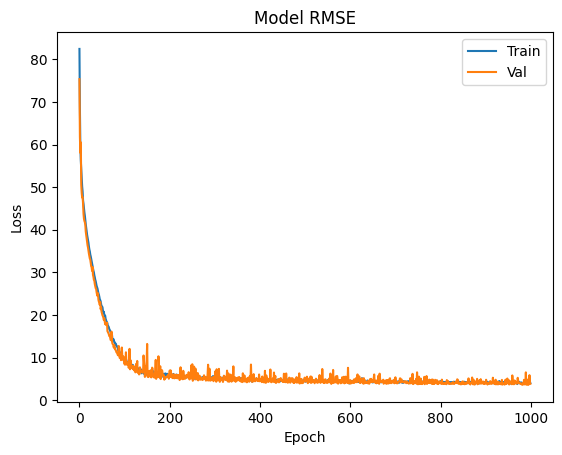

Training RMSE is
3.800840377807617
Validation RMSE is
3.600273609161377
Training loss is
14.44638729095459
Validation loss is
12.961970329284668


In [97]:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3,random_state = 42 )
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state= 42)
import numpy as np

X_train = np.asarray(X_train).astype(np.int64)
X_val = np.asarray(X_val).astype(np.int64)
X_test = np.asarray(X_test).astype(np.int64)
Y_train = np.asarray(Y_train).astype(np.float32)
Y_val = np.asarray(Y_val).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

filepath = '/content/ECFP.keras'

checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=575, verbose =1)]
output_nodes = Y.shape[1]
print(output_nodes)


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation='relu', input_shape=(4100,)), #4100 for ECFC
                             tf.keras.layers.Dense(512, activation='relu'),
                             #tf.keras.layers.Dense(1762, activation='relu'),
                             tf.keras.layers.Dense(output_nodes, activation ='relu')])

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.2), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model.fit(X, Y, epochs= 1000, callbacks=[checkpoint],validation_data=(X, Y), batch_size= None)
model.evaluate(X_test, Y_test)

# Error Graph

plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
#plt.show()
plt.savefig('1.svg', dpi = 1200)


train_acc = min(hist.history['root_mean_squared_error'])
val_acc = min(hist.history['val_root_mean_squared_error'])
train_loss = min(hist.history['loss'])
val_loss = min(hist.history['val_loss'])
print('Training RMSE is')
print(train_acc)
print('Validation RMSE is')
print(val_acc)
print('Training loss is')
print(train_loss)
print('Validation loss is')
print(val_loss)




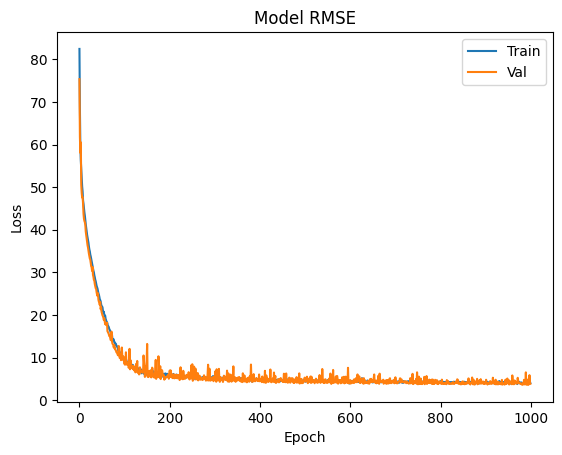

In [101]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
#plt.show()
plt.savefig('1.svg', dpi = 1200)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


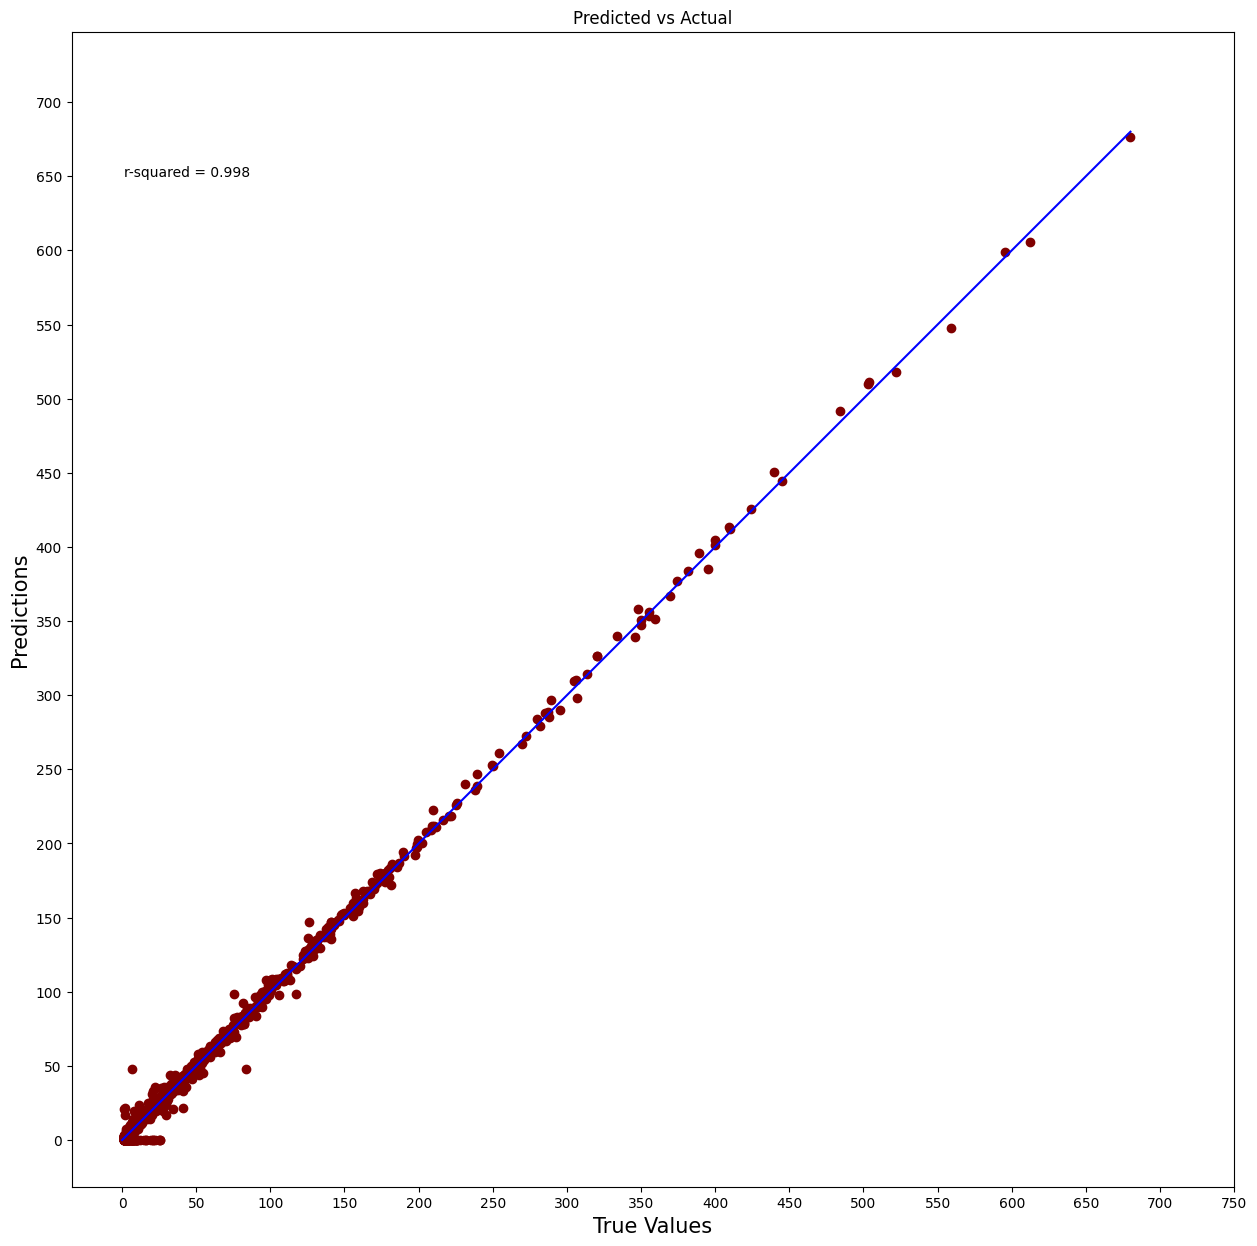

In [102]:
from sklearn.metrics import r2_score
true_value = Y
predicted_value = model.predict(X)

plt.figure(figsize=(15,15))
plt.scatter(true_value, predicted_value, c='maroon')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Predicted vs Actual')
plt.annotate("r-squared = {:.3f}".format(r2_score(true_value, predicted_value)), (1,650), )
plt.xticks( range(0,800,50) )
plt.yticks( range(0,800,50) )
#plt.show()
plt.savefig('2.svg', dpi = 1200)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


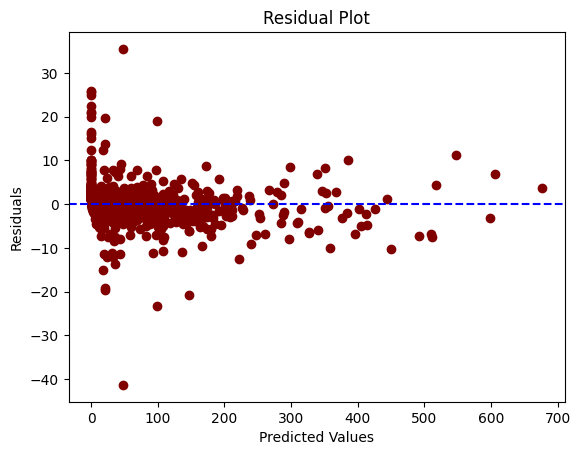

In [103]:
true_value = Y
predicted_value = model.predict(X)

residuals = true_value - predicted_value

plt.scatter(predicted_value, residuals, c='maroon')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
#plt.show()
plt.savefig('3.svg', dpi = 1200)

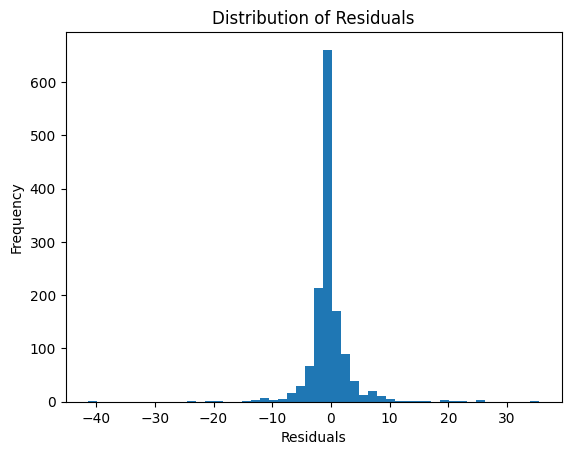

In [104]:
residuals = true_value - predicted_value

plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
#plt.show()
plt.savefig('4.svg', dpi = 1200)